In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Question 1

Function Definition

In [6]:
def f_1(x):
    return x**3 + 2*x**2 - 4*x + 1

Gradient computation at point x=2

In [7]:
# Define x as a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)

# Define the function
y = f_1(x)

# Compute the gradient
y.backward()

# Gradient at x = 2
print(f"The gradient at x = 2 is: {x.grad}")

The gradient at x = 2 is: 16.0


Function plotting along with its gradient for the range [-3, 3]

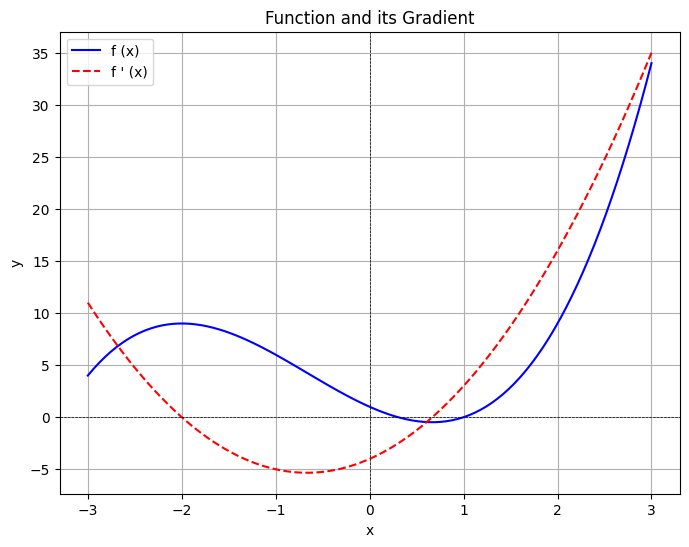

In [10]:
# Define the function's gradient
def f_prime(x):
    return 3*x**2 + 4*x - 4

# Generate x values in the range from -3 to 3
x_vals = np.linspace(-3, 3, 100)

# Compute y values for the function and its gradient
y_vals = f_1(x_vals)
grad_vals = f_prime(x_vals)

# Plot the function and its gradient
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f (x)', color='blue')
plt.plot(x_vals, grad_vals, label="f ' (x)", color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Function and its Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

The roles of `requires_grad` and `backward()`

requires_grad=True: When creating a tensor, you need to set requires_grad=True to enable gradient
tracking for that tensor. This tells PyTorch to keep track of operations performed on the tensor so it can calculate gradients later.


### Question 2

Function Definition

In [ ]:
def f_2(x, y):
    return x**2 + y**2 - 3*x*y

Plotting of Contour and Surface plots for given range

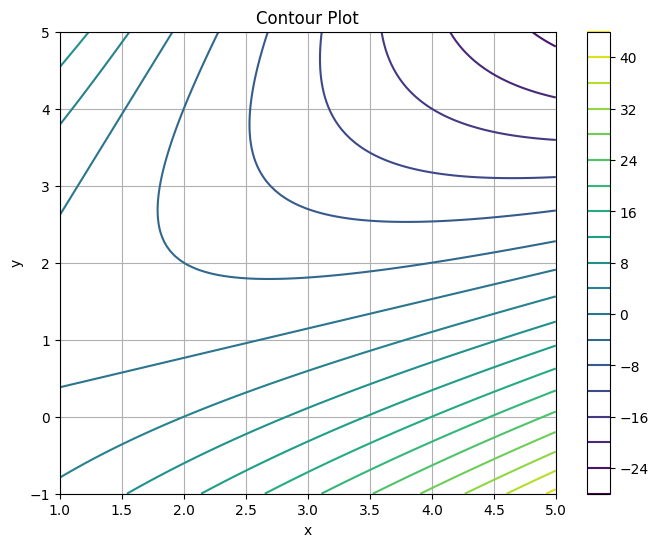

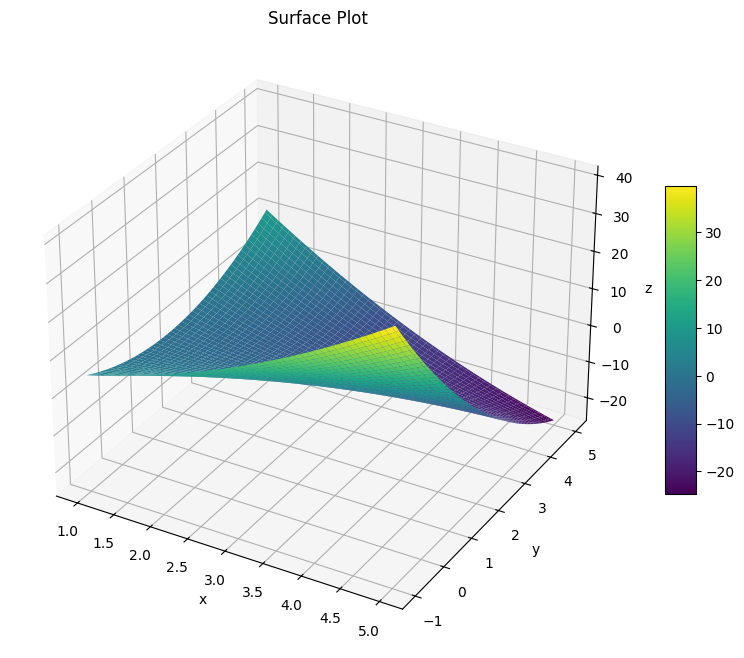

In [ ]:
# Define the range for x and y
x_range = np.linspace(1, 5, 100)
y_range = np.linspace(-1, 5, 100)

# Create a meshgrid
X, Y = np.meshgrid(x_range, y_range)

# Define the function
Z = X**2 + Y**2 - 3*X*Y

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# Create the surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
ax.set_title('Surface Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Gradient calculation at point x=2

In [ ]:
# Define x and y as tensors with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

# Define the function
z = x**2 + y**2 - 3*x*y

# Compute the gradients
z.backward()

# Gradients at (x = 2, y = 4)
print(f"The gradient with respect to x at (x=2, y=4) is: {x.grad}")
print(f"The gradient with respect to y at (x=2, y=4) is: {y.grad}")

The gradient with respect to x at (x=2, y=4) is: -8.0
The gradient with respect to y at (x=2, y=4) is: 2.0


Discussion on Gradient Vector's significance

// Write up your answer

### Question 3

##### Generate data

In [ ]:
np.random.seed(42)

n_samples = 150

def true_function(x):
    return 3*x + 4

In [ ]:
noise = np.random.normal(0, 1, n_samples)

X_norm = np.linspace(0, 150, n_samples)
y_true = true_function(X_norm)

y_norm = y_true + noise

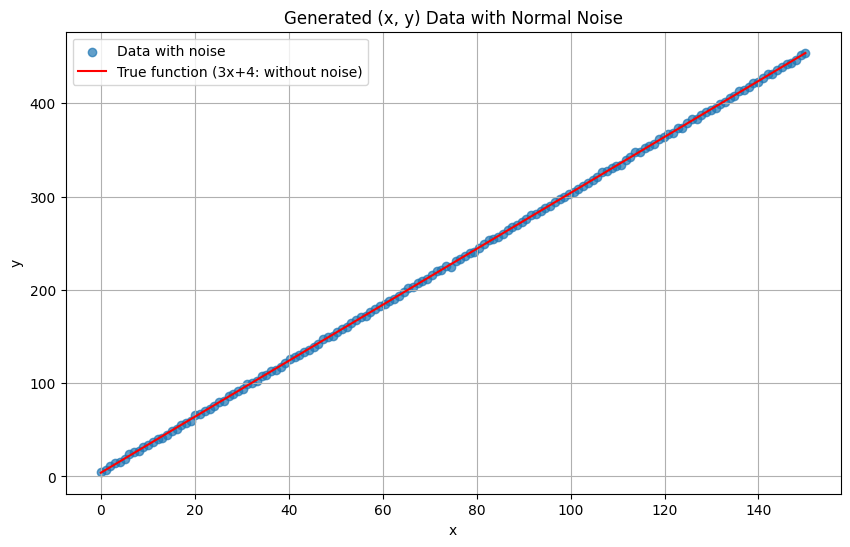

In [ ]:
# Visualize the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, y_norm, alpha=0.7, label='Data with noise')
plt.plot(X_norm, y_true, 'r-', label='True function (3x+4: without noise)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated (x, y) Data with Normal Noise')
plt.legend()
plt.grid(True)
plt.show()

##### Calculate \theta using Normal Equation

In [ ]:
X_b = np.c_[np.ones((150, 1)), X_norm]  # Add x0 = 1 to each instance
theta_best = (np.linalg.inv(X_b.T @ X_b)) @ X_b.T @ y_norm
print("Theta from Normal Equation:\n", theta_best)

Theta from Normal Equation:
 [3.85100414 3.00088892]


##### Use scikit-learn's Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_norm.reshape(-1, 1), y_norm)
print("Theta from Scikit-learn:", lin_reg.intercept_, lin_reg.coef_)

Theta from Scikit-learn: 3.851004144786117 [3.00088892]


##### Plot the data and regression line

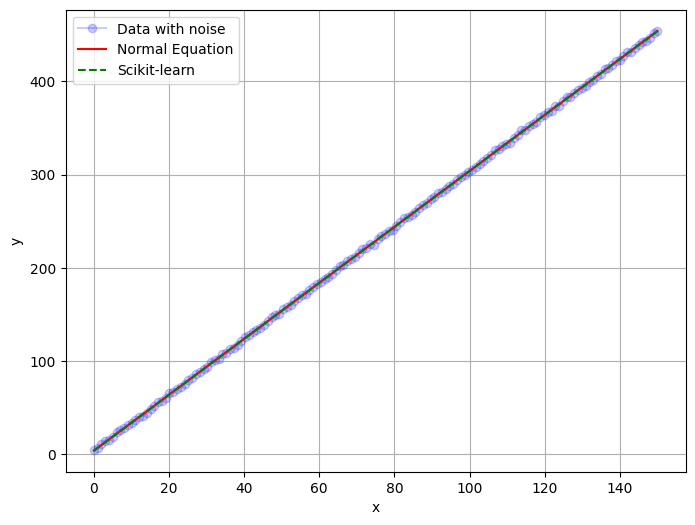

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(X_norm, y_norm, alpha=0.2, label='Data with noise', color='blue', marker='o')
plt.plot(X_norm, X_b @ theta_best, "r-", label="Normal Equation")
plt.plot(X_norm, lin_reg.predict(X_norm.reshape(-1, 1)), 'g--', label="Scikit-learn")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

##### Scenario when Normal Equation is more prefferable than gradient based approach

Small to medium datasets - Normal Equation provides exact solution without iterations when n < ~10,000 samples, while gradient descent becomes more efficient for larger datasets

No hyperparameter tuning - Normal Equation doesn't require learning rate selection or convergence monitoring, eliminating tuning steps needed in gradient methods

Few features - Particularly efficient when feature count is low, as matrix inversion complexity grows cubically with feature count (O(n³))

Exact solution required - Delivers mathematical precision in one computation step, compared to approximate convergence in iterative methods

### Question 4

#### Part A

In [ ]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X_norm, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y_norm, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define linear regression model
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)  # 1 input, 1 output

    def forward(self, x):
        return self.linear(x)

In [ ]:
# Initialize model, loss function, and optimizer
model = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [ ]:
epochs = 100
loss_history = []

# Training loop
for epoch in range(epochs):
    # Mini-batch SGD
    for i in range(n_samples):
        # Forward pass
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Store loss for plotting
    loss_history.append(loss.item())

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 3.0557
Epoch [20/100], Loss: 2.7499
Epoch [30/100], Loss: 2.4872
Epoch [40/100], Loss: 2.2613
Epoch [50/100], Loss: 2.0672
Epoch [60/100], Loss: 1.9004
Epoch [70/100], Loss: 1.7570
Epoch [80/100], Loss: 1.6338
Epoch [90/100], Loss: 1.5279
Epoch [100/100], Loss: 1.4369


In [ ]:
# Get final parameters
w = model.linear.weight.item()
b = model.linear.bias.item()
print(f'Learned parameters: w = {w:.2f}, b = {b:.2f}')

Learned parameters: w = 3.02, b = 2.37


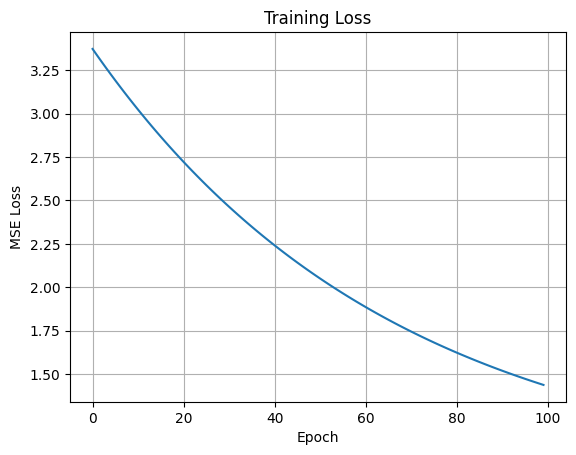

In [ ]:
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('MSE Loss')
plt.show()

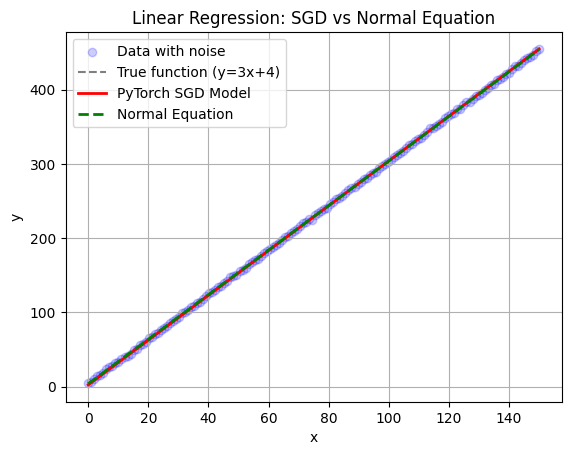

In [ ]:
# Visualize regression results
plt.scatter(X_norm, y_norm, alpha=0.2, color='blue', label='Data with noise')

# Plot true function
plt.plot(X_norm, y_true, 'k--', alpha=0.5, label='True function (y=3x+4)')

# PyTorch model prediction
with torch.no_grad():
    y_pred = model(X_tensor).numpy()
plt.plot(X_norm, y_pred, 'r-', linewidth=2, label='PyTorch SGD Model')

# Normal Equation prediction
y_normal_eq = X_b @ theta_best
plt.plot(X_norm, y_normal_eq, 'g--', linewidth=2, label='Normal Equation')

# Add grid and labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression: SGD vs Normal Equation')
plt.grid(True)
plt.show()

#### Part B:

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten images
])

In [ ]:
# Load full MNIST dataset
full_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
full_test = datasets.MNIST('./data', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:04<00:00, 2.33MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 139kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 23.7kB/s]


- Binary Classification (0 vs not 0)

In [ ]:
binary_train = Subset(full_train, [i for i, (_, label) in enumerate(full_train) if label == 0])
binary_test = Subset(full_test, [i for i, (_, label) in enumerate(full_test) if label == 0])

# Create DataLoaders
batch_size = 64
binary_train_loader = DataLoader(binary_train, batch_size=batch_size, shuffle=True)
binary_test_loader = DataLoader(binary_test, batch_size=batch_size)

In [ ]:
# Binary model definition
class BinaryLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

binary_model = BinaryLogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(binary_model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 20
for epoch in range(epochs):
    for data, targets in binary_train_loader:
        targets = targets.float().unsqueeze(1)  # BCELoss expects same shape as output
        optimizer.zero_grad()
        outputs = binary_model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        total = 0
        correct = 0
        for data, targets in binary_test_loader:
            outputs = binary_model(data)
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted.squeeze() == targets).sum().item()

    print(f'Epoch [{epoch+1}/{epochs}], Accuracy: {100*correct/total:.2f}%')

Epoch [1/20], Accuracy: 100.00%
Epoch [2/20], Accuracy: 100.00%
Epoch [3/20], Accuracy: 100.00%
Epoch [4/20], Accuracy: 100.00%
Epoch [5/20], Accuracy: 100.00%
Epoch [6/20], Accuracy: 100.00%
Epoch [7/20], Accuracy: 100.00%
Epoch [8/20], Accuracy: 100.00%
Epoch [9/20], Accuracy: 100.00%
Epoch [10/20], Accuracy: 100.00%
Epoch [11/20], Accuracy: 100.00%
Epoch [12/20], Accuracy: 100.00%
Epoch [13/20], Accuracy: 100.00%
Epoch [14/20], Accuracy: 100.00%
Epoch [15/20], Accuracy: 100.00%
Epoch [16/20], Accuracy: 100.00%
Epoch [17/20], Accuracy: 100.00%
Epoch [18/20], Accuracy: 100.00%
Epoch [19/20], Accuracy: 100.00%
Epoch [20/20], Accuracy: 100.00%


- Multiclass Classification

In [ ]:
# Create DataLoaders for full dataset
train_loader = DataLoader(full_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(full_test, batch_size=batch_size)

In [ ]:
# Multiclass model definition
class MulticlassLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)

    def forward(self, x):
        return self.linear(x)

multiclass_model = MulticlassLogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(multiclass_model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 20
for epoch in range(epochs):
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = multiclass_model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        total = 0
        correct = 0
        for data, targets in test_loader:
            outputs = multiclass_model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    print(f'Epoch [{epoch+1}/{epochs}], Accuracy: {100*correct/total:.2f}%')

Epoch [1/20], Accuracy: 90.77%
Epoch [2/20], Accuracy: 91.32%
Epoch [3/20], Accuracy: 91.63%
Epoch [4/20], Accuracy: 91.83%
Epoch [5/20], Accuracy: 91.94%
Epoch [6/20], Accuracy: 91.97%
Epoch [7/20], Accuracy: 92.05%
Epoch [8/20], Accuracy: 92.02%
Epoch [9/20], Accuracy: 92.06%
Epoch [10/20], Accuracy: 92.20%
Epoch [11/20], Accuracy: 92.30%
Epoch [12/20], Accuracy: 92.13%
Epoch [13/20], Accuracy: 92.35%
Epoch [14/20], Accuracy: 92.28%
Epoch [15/20], Accuracy: 92.29%
Epoch [16/20], Accuracy: 92.37%
Epoch [17/20], Accuracy: 92.30%
Epoch [18/20], Accuracy: 92.28%
Epoch [19/20], Accuracy: 92.41%
Epoch [20/20], Accuracy: 92.59%


In [ ]:
# Utility function to get misclassified samples
def get_misclassified_samples(model, loader, num_samples=3, is_binary=False):
    misclassified = []
    model.eval()
    with torch.no_grad():
        for data, targets in loader:
            outputs = model(data)
            if is_binary:
                preds = (outputs > 0.5).squeeze().int()
            else:
                preds = outputs.argmax(dim=1)

            mask = preds != targets
            for img, true, pred in zip(data[mask], targets[mask], preds[mask]):
                misclassified.append((
                    img.view(28, 28).numpy(),  # Reshape to original image
                    true.item(),
                    pred.item()
                ))
                if len(misclassified) >= num_samples:
                    return misclassified
    return misclassified

def plot_samples(samples, title):
    plt.figure(figsize=(12, 4))
    for i, (img, true, pred) in enumerate(samples):
        plt.subplot(1, len(samples), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {true}\nPred: {pred}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [ ]:
# For binary model
binary_model.eval()
with torch.no_grad():
    total = correct = 0
    for data, targets in binary_test_loader:
        outputs = binary_model(data)
        preds = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (preds.squeeze() == targets).sum().item()

print(f'\nFinal Binary Model Accuracy: {100*correct/total:.2f}%')
binary_misclassified = get_misclassified_samples(binary_model, binary_test_loader,
                                                num_samples=3, is_binary=True)
plot_samples(binary_misclassified, 'Binary Model Misclassifications')


Final Binary Model Accuracy: 100.00%


<Figure size 1200x400 with 0 Axes>


Final Multiclass Model Accuracy: 92.59%


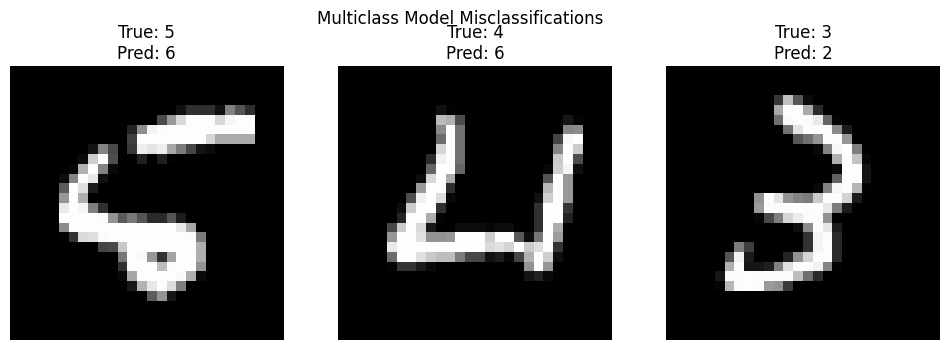

In [ ]:
# For multiclass model
multiclass_model.eval()
with torch.no_grad():
    correct = total = 0
    for data, targets in test_loader:
        outputs = multiclass_model(data)
        _, preds = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (preds == targets).sum().item()

print(f'\nFinal Multiclass Model Accuracy: {100*correct/total:.2f}%')
multiclass_misclassified = get_misclassified_samples(multiclass_model, test_loader)
plot_samples(multiclass_misclassified, 'Multiclass Model Misclassifications')

### Question 5

In [ ]:
housing_data = fetch_california_housing()

In [ ]:
# Extract the features from housing_data
X_lin = housing_data['data']
y_lin = housing_data['target']

# Apply polynomial transformation
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_lin)

# Display the shape of the transformed features
print(f"Original feature shape: {X_lin.shape}")
print(f"Transformed feature shape: {X_poly.shape}")

Original feature shape: (20640, 8)
Transformed feature shape: (20640, 164)


In [ ]:
model_orig = LinearRegression().fit(X_lin, y_lin)
model_poly = LinearRegression().fit(X_poly, y_lin)

rmse_orig = np.sqrt(np.mean((model_orig.predict(X_lin) - y_lin)**2))
rmse_poly = np.sqrt(np.mean((model_poly.predict(X_poly) - y_lin)**2))

print(f"RMSE for original features: {rmse_orig}")
print(f"RMSE for polynomial features: {rmse_poly}")

RMSE for original features: 0.7241001216576387
RMSE for polynomial features: 0.5906644840532731


##### Comparision for RMSEs:

The RMSE for poly-featured model is much better compared to original-featured model.<br>
Suggesting that, model is better explanable in higher dimension.

##### Model flexibility improvment using basis function

`Dimensionality transformation`: Maps data to higher-dimensional spaces where linear models can capture nonlinear patterns<br><br>
`Representation power`: Enables simple models (like linear regression) to fit complex data relationships without changing the underlying model architecture<br><br>
`Feature interactions`: Captures interactions between input variables (e.g., xy, x²y terms) that simple linear models cannot represent<br><br>
`Adjustable complexity`: Controls model capacity through selection of basis function type and degree/parameters<br><br>
`Adaptable representation`: Different basis functions (polynomial, radial, Fourier) can model different types of relationships in data<br><br>
`Computational efficiency`: Maintains the computational benefits of linear models while increasing expressive power<br><br>
`Compatible with regularization`: Can be paired with regularization techniques to prevent overfitting despite increased flexibility<br><br>

Basis functions essentially create a bridge between simple, interpretable linear models and the complex, nonlinear patterns present in real-world data.